In [2]:
import os
os.chdir('./..')

In [3]:
import matplotlib.pyplot as plt
import data
import pandas as pd
from tqdm import tqdm

In [15]:
def preprocess_group(df):
    # compute the duration of the session
    duration = int(df.tail(1)['timestamp'])-int(df.head(1)['timestamp'])

    # reference seen ordered by time
    action_list = []
    indx_list = []
    reference_list = []
    filter_list = []
    number_of_action_with_numeric_reference = 0
    number_of_action_with_NON_numeric_reference = 0
    clickout_equal_last_reference = False
    clickout_in_reference = False
    number_of_action_type_dict = {}
    last_clickout = None

    for idx, row in df.iterrows():
        indx_list.append(idx)
        action = row['action_type']
        action_list.append(action)

        if action not in number_of_action_type_dict:
            number_of_action_type_dict[action] = 1
        else:
            number_of_action_type_dict[action] += 1

        ref = row['reference']
        try:
            ref = int(ref)
            if action == 'clickout item':
                last_clickout = ref
            reference_list.append(ref)
            number_of_action_with_numeric_reference += 1
        except ValueError:
            number_of_action_with_NON_numeric_reference += 1
            filter_list.append(ref)

    if len(reference_list) > 1:
        if last_clickout is not None:
            del reference_list[-1]
        if last_clickout == reference_list[-1]:
            clickout_equal_last_reference = True
    if last_clickout in reference_list:
        clickout_in_reference = True
    
    final_dict = {
        'duration':duration,
        'number_of_action_with_numeric_reference':number_of_action_with_numeric_reference,
        'number_of_action_with_NON_numeric_reference':number_of_action_with_NON_numeric_reference,
        'clickout_equal_last_reference':clickout_equal_last_reference,
        'clickout_in_reference':clickout_in_reference,
        'last_clickout':last_clickout,
        'action_list':action_list,
        'number_of_action_type_dict':number_of_action_type_dict
    }
    
    return final_dict

In [36]:
    tqdm.pandas()
    df = pd.read_csv('dataset/preprocessed/full.csv', nrows=100000)
    temp = df.groupby(['session_id', 'user_id']).progress_apply(preprocess_group)



100%|██████████| 4943/4943 [00:09<00:00, 534.39it/s]


# try to draw something... feeling like an architect...

100%|██████████| 54233/54233 [00:00<00:00, 790827.57it/s]


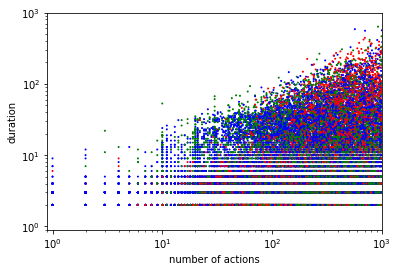

In [14]:
x = []
y = []
c = []
for t in tqdm(temp):
    dict = t
    x.append(dict['duration'])
    y.append(dict['number_of_action_with_numeric_reference']+dict['number_of_action_with_NON_numeric_reference'])
    if dict['clickout_equal_last_reference']:
        c.append('blue')
    else:
        if dict['clickout_in_reference']:
            c.append('red')
        else:
            c.append('green')
        

plt.xlabel('number of actions')
plt.ylabel('duration')
plt.xscale('log')
plt.yscale('log')
plt.xlim((0,1000))
plt.ylim((0,1000))

plt.scatter(x,y,c=c, s=1)

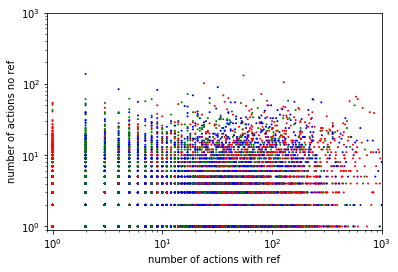

In [15]:
x = []
y = []
c = []
for t in temp:
    dict = t
    x.append(dict['number_of_action_with_numeric_reference'])
    y.append(dict['number_of_action_with_NON_numeric_reference'])
    if dict['clickout_equal_last_reference']:
        c.append('blue')
    else:
        if dict['clickout_in_reference']:
            c.append('red')
        else:
            c.append('green')
        
plt.xlabel('number of actions with ref')
plt.ylabel('number of actions no ref')
plt.xscale('log')
plt.yscale('log')
plt.xlim((0,1000))
plt.ylim((0,1000))
plt.scatter(x,y,c=c, s=1)

In [46]:
dict_y = {}
count_y = 0
for t in temp:
    if(t['clickout_equal_last_reference']):
        count_y+=1
        if tuple(t['action_list'][-2:]) not in dict_y:
            dict_y[tuple(t['action_list'][-2:])] = 1
        else:
            dict_y[tuple(t['action_list'][-2:])] += 1
print(dict_y)
        

{('clickout item', 'clickout item'): 312, ('search for item', 'clickout item'): 100, ('interaction item info', 'clickout item'): 123, ('interaction item deals', 'clickout item'): 151, ('interaction item image', 'interaction item image'): 168, ('clickout item', 'interaction item deals'): 99, ('interaction item image', 'clickout item'): 477, ('change of sort order', 'filter selection'): 7, ('interaction item image', 'interaction item deals'): 24, ('clickout item', 'search for item'): 11, ('interaction item deals', 'interaction item deals'): 22, ('clickout item', 'filter selection'): 2, ('filter selection', 'interaction item deals'): 4, ('clickout item', 'interaction item image'): 39, ('interaction item info', 'interaction item image'): 2, ('clickout item', 'interaction item info'): 44, ('search for destination', 'interaction item deals'): 4, ('interaction item deals', 'interaction item image'): 1, ('interaction item image', 'interaction item info'): 16, ('filter selection', 'search for p

In [47]:
dict_n = {}
count_n = 0
for t in temp:
    if(not t['clickout_equal_last_reference']):
        count_n +=1
        if tuple(t['action_list'][-2:]) not in dict_n:
            dict_n[tuple(t['action_list'][-2:])] = 1
        else:
            dict_n[tuple(t['action_list'][-2:])] += 1
print(dict_n)

{('clickout item',): 959, ('filter selection', 'clickout item'): 176, ('search for destination', 'clickout item'): 242, ('clickout item', 'clickout item'): 546, ('change of sort order', 'filter selection'): 58, ('interaction item deals', 'clickout item'): 89, ('search for poi', 'clickout item'): 87, ('interaction item image', 'interaction item image'): 371, ('search for destination',): 51, ('interaction item image', 'interaction item deals'): 44, ('interaction item deals', 'interaction item deals'): 37, ('interaction item info', 'interaction item deals'): 26, ('search for destination', 'search for destination'): 28, ('interaction item image', 'interaction item info'): 40, ('interaction item image', 'clickout item'): 154, ('interaction item info', 'clickout item'): 31, ('filter selection', 'filter selection'): 24, ('search for destination', 'search for poi'): 6, ('search for item', 'clickout item'): 31, ('search for poi',): 14, ('search for item', 'search for item'): 9, ('interaction it

1692
{('clickout item', 'clickout item'): 312, ('search for item', 'clickout item'): 100, ('interaction item info', 'clickout item'): 123, ('interaction item deals', 'clickout item'): 151, ('interaction item image', 'interaction item image'): 168, ('clickout item', 'interaction item deals'): 99, ('interaction item image', 'clickout item'): 477, ('change of sort order', 'filter selection'): 7, ('interaction item image', 'interaction item deals'): 24, ('clickout item', 'search for item'): 11, ('interaction item deals', 'interaction item deals'): 22, ('clickout item', 'filter selection'): 2, ('filter selection', 'interaction item deals'): 4, ('clickout item', 'interaction item image'): 39, ('interaction item info', 'interaction item image'): 2, ('clickout item', 'interaction item info'): 44, ('search for destination', 'interaction item deals'): 4, ('interaction item deals', 'interaction item image'): 1, ('interaction item image', 'interaction item info'): 16, ('filter selection', 'search 

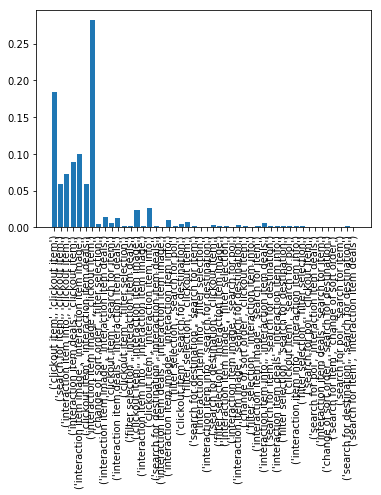

In [84]:
print(count_y)
print(dict_y)

plt.bar(range(len(dict_y)), [x/count_y for x in dict_y.values()], align='center')
plt.xticks(range(len(dict_y)), list(dict_y.keys()), rotation='vertical')
plt.show()

3251
{('clickout item',): 959, ('filter selection', 'clickout item'): 176, ('search for destination', 'clickout item'): 242, ('clickout item', 'clickout item'): 546, ('change of sort order', 'filter selection'): 58, ('interaction item deals', 'clickout item'): 89, ('search for poi', 'clickout item'): 87, ('interaction item image', 'interaction item image'): 371, ('search for destination',): 51, ('interaction item image', 'interaction item deals'): 44, ('interaction item deals', 'interaction item deals'): 37, ('interaction item info', 'interaction item deals'): 26, ('search for destination', 'search for destination'): 28, ('interaction item image', 'interaction item info'): 40, ('interaction item image', 'clickout item'): 154, ('interaction item info', 'clickout item'): 31, ('filter selection', 'filter selection'): 24, ('search for destination', 'search for poi'): 6, ('search for item', 'clickout item'): 31, ('search for poi',): 14, ('search for item', 'search for item'): 9, ('interacti

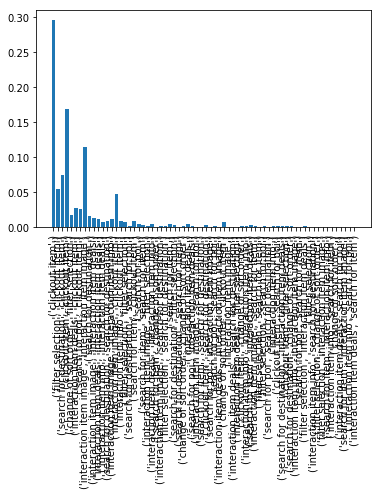

In [85]:
print(count_n)
print(dict_n)
plt.bar(range(len(dict_n)), [x/count_n for x in dict_n.values()],align='center')
plt.xticks(range(len(dict_n)), list(dict_n.keys()), rotation='vertical')
plt.show()